In [4]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.8.0


## 加载数据集

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## 探索数据

In [6]:
print(train_images.shape)
print(train_labels.shape)
type(train_images)

(60000, 28, 28)
(60000,)


numpy.ndarray

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## 预处理数据

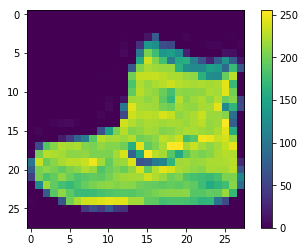

In [8]:
%matplotlib inline
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

### 归一化

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

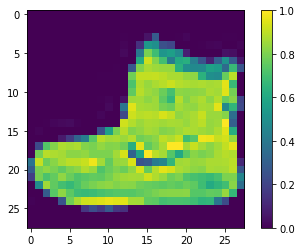

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [11]:
#plt.xticks?

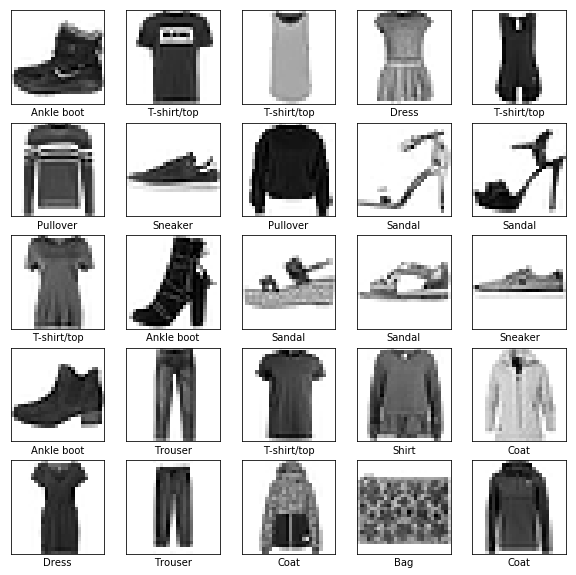

In [12]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

## 构建模型

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)]
)

## 编译模型

In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

## 训练模型

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.5103 - acc: 0.8155
Epoch 2/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.3788 - acc: 0.8616
Epoch 3/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.3438 - acc: 0.8745
Epoch 4/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.3197 - acc: 0.8831
Epoch 5/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.3040 - acc: 0.8882
Epoch 6/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.2895 - acc: 0.8932
Epoch 7/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.2752 - acc: 0.8973
Epoch 8/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.2704 - acc: 0.9000
Epoch 9/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.2562 - acc: 0.9038
Epoch 10/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.2487 - a

## 模型评估

In [16]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy', test_acc)

10000/10000 [==============================] - 1s 50us/step
Test accuracy 0.8764


## 预测

In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([2.0989832e-08, 5.0864159e-08, 2.6030925e-10, 1.1737697e-07,
       1.5309973e-10, 3.5084027e-04, 3.7610017e-09, 5.7243258e-03,
       1.8190217e-08, 9.9392468e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

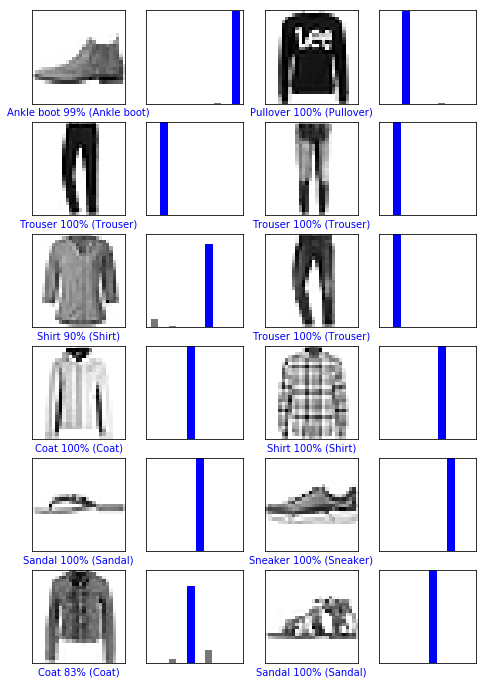

In [22]:
plt.figure(figsize=(8,12))
for i in range(12):
    plt.subplot(6,4,2*i + 1)
    plot_image(i, predictions, test_labels, test_images)

    plt.subplot(6,4,2*i+2)
    plot_value_array(i, predictions,  test_labels)

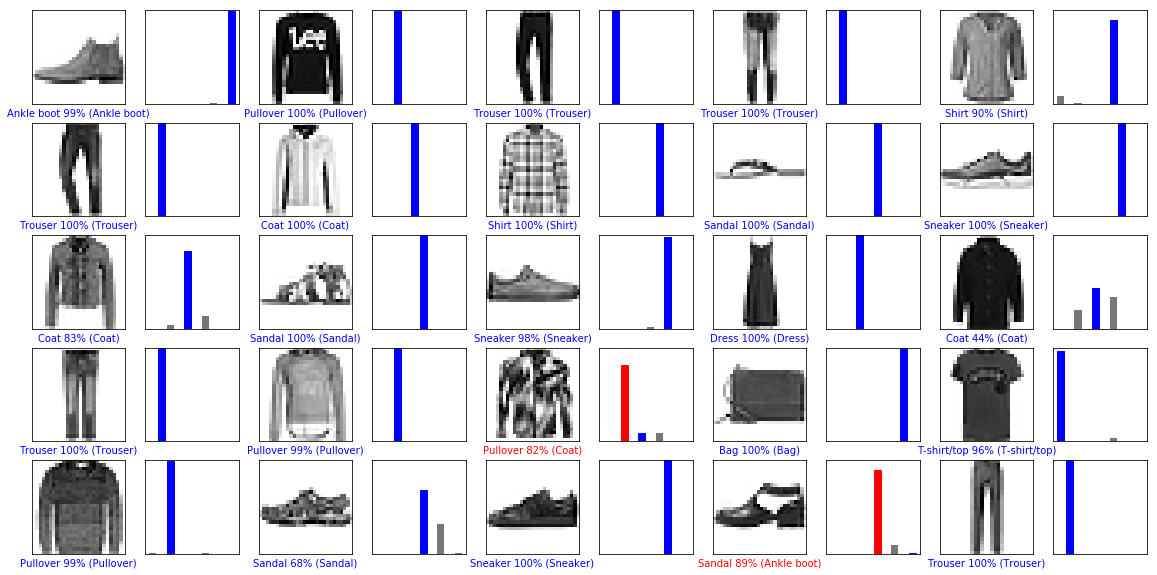

In [23]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [24]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [25]:
#Add the image to a batch where it's the only member.
#tf.keras 模型已经过优化，可以一次性对样本批次或样本集进行预测。因此，即使我们使用单个图像，仍需将图片转换成三维张量
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)
print(predictions_single)
np.argmax(predictions_single[0])

[[2.0989869e-08 5.0864251e-08 2.6030969e-10 1.1737706e-07 1.5310030e-10
  3.5084036e-04 3.7610084e-09 5.7243309e-03 1.8190251e-08 9.9392456e-01]]


9

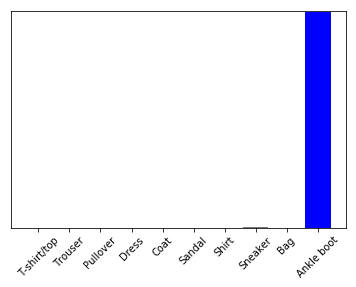

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)